In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import datapackage
from sqlalchemy import create_engine
import numpy as np
from config import key
import pymysql
pymysql.install_as_MySQLdb() #this is needed for SQL Alchemy because they need a MySQL Library

In [25]:
yearly_df = pd.read_csv("../Raw_Data/Climate/annual.csv")
yearly_df.tail()

,Source,Year,Mean
269,GISTEMP,1882,-0.1000
270,GCAG,1881,-0.0628
271,GISTEMP,1881,-0.1200
272,GCAG,1880,-0.1148
273,GISTEMP,1880,-0.2000


In [26]:
GIS_df = yearly_df[yearly_df['Source']=='GISTEMP']
GIS_df.tail()

,Source,Year,Mean
265,GISTEMP,1884,-0.28
267,GISTEMP,1883,-0.21
269,GISTEMP,1882,-0.10
271,GISTEMP,1881,-0.12
273,GISTEMP,1880,-0.20


In [27]:
GIS_df = GIS_df.drop(columns=['Source'])

In [28]:
GIS_df.head()

,Year,Mean
1,2016,0.99
3,2015,0.87
5,2014,0.74
7,2013,0.65
9,2012,0.63


In [29]:
GIS_df=GIS_df.reset_index()

In [30]:
GIS_df = GIS_df.rename(columns={"index": "ID"})

In [31]:
GIS_df.set_index("ID", inplace=True)

In [32]:
GIS_df.head()

,Year,Mean
ID,,
1,2016,0.99
3,2015,0.87
5,2014,0.74
7,2013,0.65
9,2012,0.63


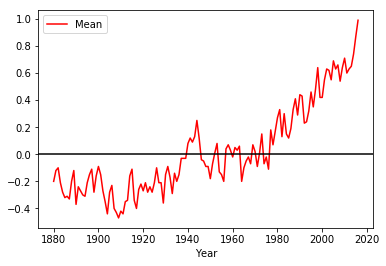

In [33]:
GIS_df.plot(kind='line',x='Year',y='Mean',color='red')
plt.axhline(0, color='black')
plt.show()

In [34]:
connection_string = (f"root:{key}@localhost/mortality")
engine = create_engine(f'mysql://{connection_string}')

In [ ]:
 # Confirm tables
engine.table_names()

In [ ]:
 GIS_df.to_sql(name='climate', con=engine, if_exists='append', index=True)

In [ ]:
pd.read_sql_query('select * from climate', con=engine).head()